In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("encoded.csv")

In [3]:
df.sample(5)

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
1269,1270,78.0,11344.0,1,5,5,1958,1958,180.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144000
961,962,69.0,12227.0,1,6,7,1977,1995,424.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272000
708,709,65.0,9018.0,1,7,5,2007,2007,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179540
357,358,44.0,4224.0,1,5,5,1976,1976,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,134000
526,527,70.0,13300.0,1,5,7,1956,2000,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132000


In [5]:
df.shape

(1460, 232)

#### handling numerical columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 232 entries, Id to SalePrice
dtypes: float64(198), int64(34)
memory usage: 2.6 MB


<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

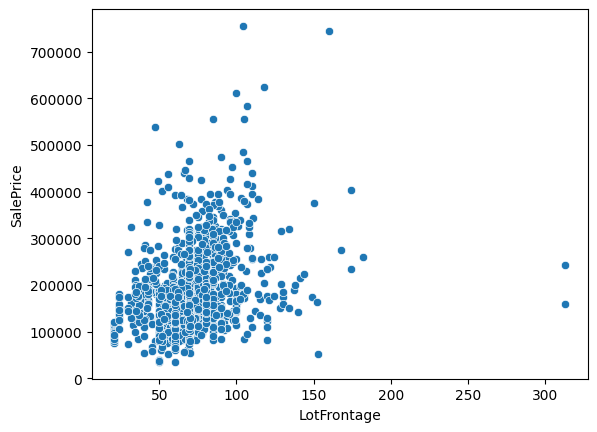

In [10]:
sns.scatterplot(x=df["LotFrontage"], y=df["SalePrice"])

In [13]:
q1 = df["LotFrontage"].quantile(0.025)
q3 = df["LotFrontage"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['LotFrontage'] < lower_bound) | (df['LotFrontage'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
934,935,313.0,22698.25,1,7,7,1960,2007,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242000
1298,1299,313.0,22698.25,1,10,5,2008,2008,796.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000


In [14]:
# Calculate 97.5th percentile
lot_frontage_threshold = df['LotFrontage'].quantile(0.975)

# Cap values at the 97.5th percentile
df['LotFrontage'] = np.where(df['LotFrontage'] > lot_frontage_threshold, lot_frontage_threshold, df['LotFrontage'])

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

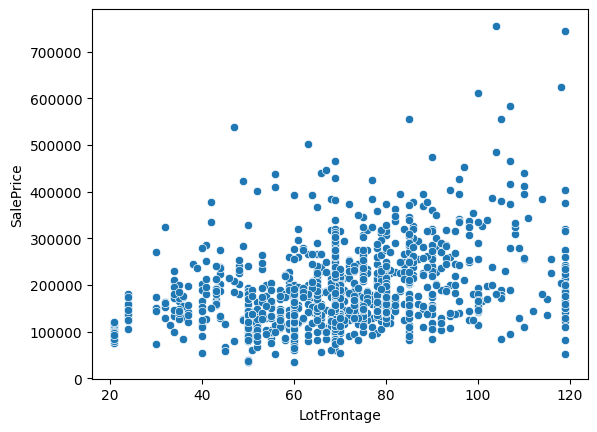

In [15]:
sns.scatterplot(x=df["LotFrontage"], y=df["SalePrice"])

(array([ 48.,  50., 107., 242., 483., 177., 172.,  81.,  47.,  53.]),
 array([ 21.   ,  30.805,  40.61 ,  50.415,  60.22 ,  70.025,  79.83 ,
         89.635,  99.44 , 109.245, 119.05 ]),
 <BarContainer object of 10 artists>)

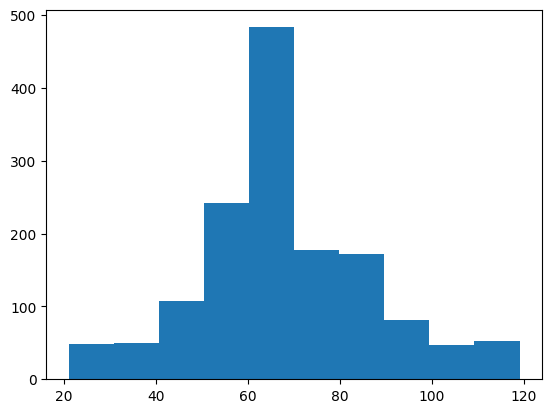

In [16]:
plt.hist(df["LotFrontage"])

In [17]:
saleprice_column = df.pop("SalePrice")
df['SalePrice'] = saleprice_column
df.head()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,1,65.0,8450.0,1,7,5,2003,2003,196.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,2,80.0,9600.0,1,6,8,1976,1976,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,3,68.0,11250.0,1,7,5,2001,2002,162.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,4,60.0,9550.0,1,7,5,1915,1970,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,84.0,14260.0,1,8,5,2000,2000,350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000


In [18]:
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8076287232884338

In [24]:
df

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,1,65.0,8450.0,1,7,5,2003,2003,196.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,2,80.0,9600.0,1,6,8,1976,1976,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,3,68.0,11250.0,1,7,5,2001,2002,162.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,4,60.0,9550.0,1,7,5,1915,1970,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,84.0,14260.0,1,8,5,2000,2000,350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,1,6,5,1999,2000,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,1457,85.0,13175.0,1,6,6,1978,1988,119.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,1458,66.0,9042.0,1,7,9,1941,2006,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,1459,68.0,9717.0,1,5,6,1950,1996,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

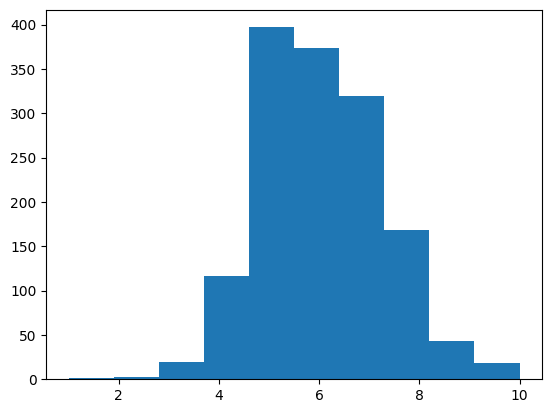

In [25]:
plt.hist(df["OverallQual"])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

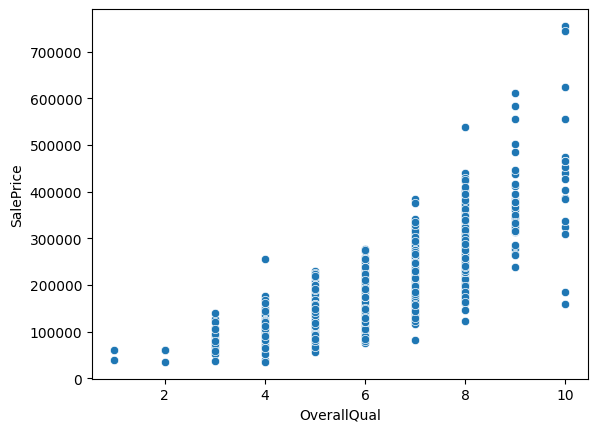

In [26]:
sns.scatterplot(x=df["OverallQual"], y=df["SalePrice"])

(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

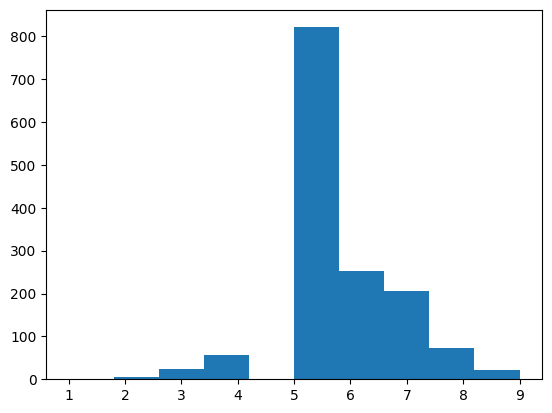

In [27]:
plt.hist(df["OverallCond"])

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

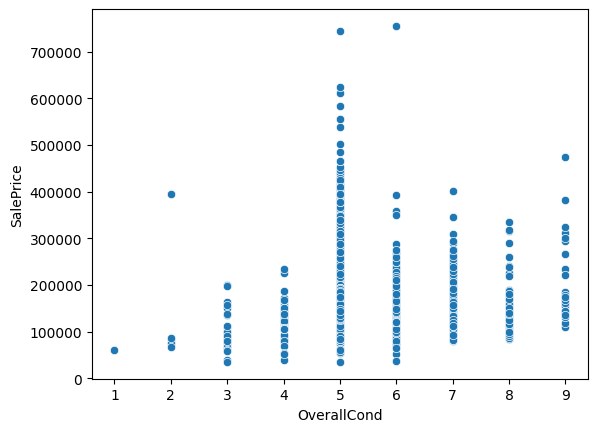

In [28]:
sns.scatterplot(x=df["OverallCond"], y=df["SalePrice"])

In [29]:
df

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,1,65.0,8450.0,1,7,5,2003,2003,196.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,2,80.0,9600.0,1,6,8,1976,1976,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,3,68.0,11250.0,1,7,5,2001,2002,162.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,4,60.0,9550.0,1,7,5,1915,1970,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,84.0,14260.0,1,8,5,2000,2000,350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,1,6,5,1999,2000,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,1457,85.0,13175.0,1,6,6,1978,1988,119.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,1458,66.0,9042.0,1,7,9,1941,2006,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,1459,68.0,9717.0,1,5,6,1950,1996,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


(array([1.085e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <BarContainer object of 10 artists>)

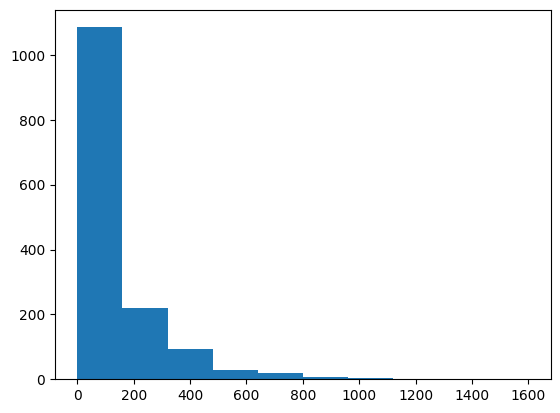

In [30]:
plt.hist(df["MasVnrArea"])

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

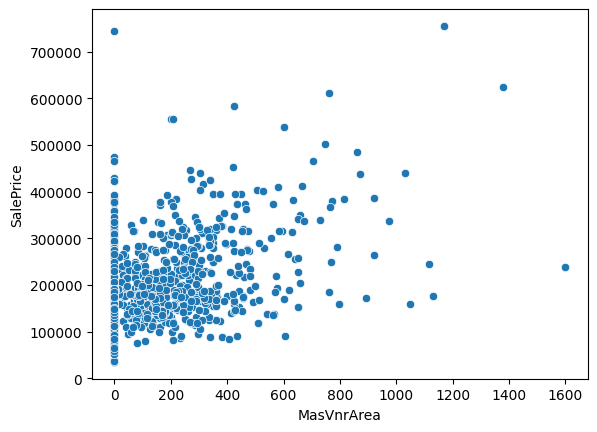

In [31]:
sns.scatterplot(x=df["MasVnrArea"], y=df["SalePrice"])

In [32]:
q1 = df["MasVnrArea"].quantile(0.025)
q3 = df["MasVnrArea"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['MasVnrArea'] < lower_bound) | (df['MasVnrArea'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
297,298,66.0,7399.00,1,7,5,1997,1998,1600.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239000
691,692,104.0,21535.00,1,10,6,1994,1995,1170.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755000
1169,1170,118.0,22698.25,1,10,5,1995,1996,1378.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,625000


In [33]:
# Calculate 97.5th percentile
mas_vnr_area_threshold = df['MasVnrArea'].quantile(0.975)

# Cap values at the 97.5th percentile
df['MasVnrArea'] = np.where(df['MasVnrArea'] > mas_vnr_area_threshold, mas_vnr_area_threshold, df['MasVnrArea'])

In [34]:
q1 = df["MasVnrArea"].quantile(0.025)
q3 = df["MasVnrArea"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['MasVnrArea'] < lower_bound) | (df['MasVnrArea'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice


(array([919., 115., 107.,  76.,  77.,  54.,  26.,  27.,   9.,  50.]),
 array([  0.  ,  61.03, 122.06, 183.09, 244.12, 305.15, 366.18, 427.21,
        488.24, 549.27, 610.3 ]),
 <BarContainer object of 10 artists>)

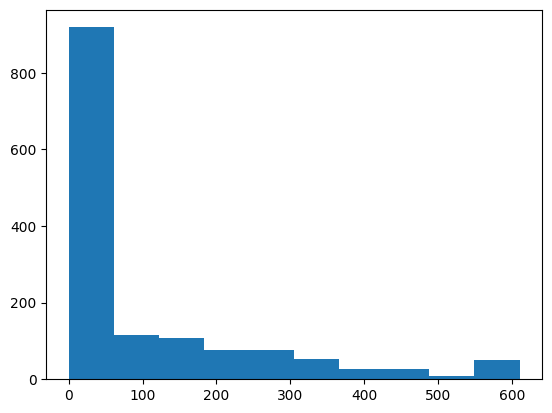

In [35]:
plt.hist(df["MasVnrArea"])

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

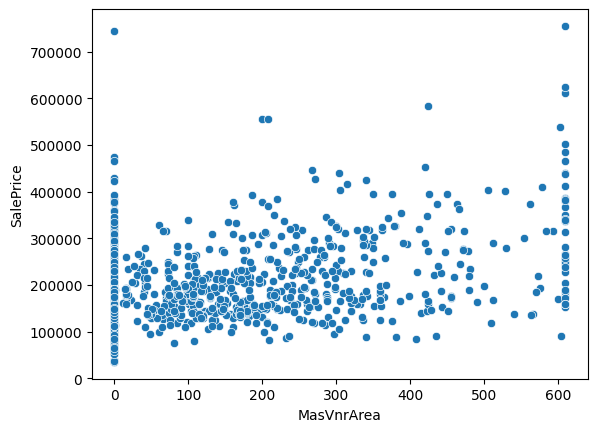

In [36]:
sns.scatterplot(x=df["MasVnrArea"], y=df["SalePrice"])

(array([919., 417., 114.,   8.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,  564.4, 1128.8, 1693.2, 2257.6, 2822. , 3386.4, 3950.8,
        4515.2, 5079.6, 5644. ]),
 <BarContainer object of 10 artists>)

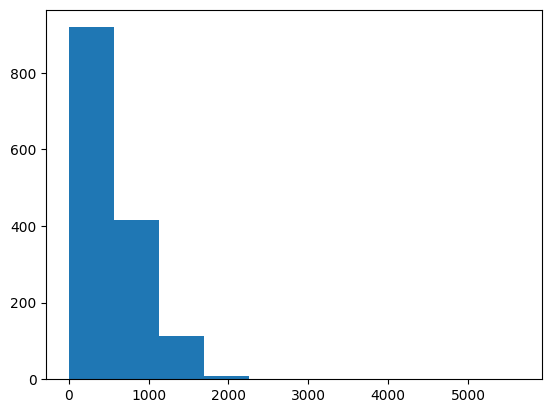

In [37]:
plt.hist(df["BsmtFinSF1"])

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

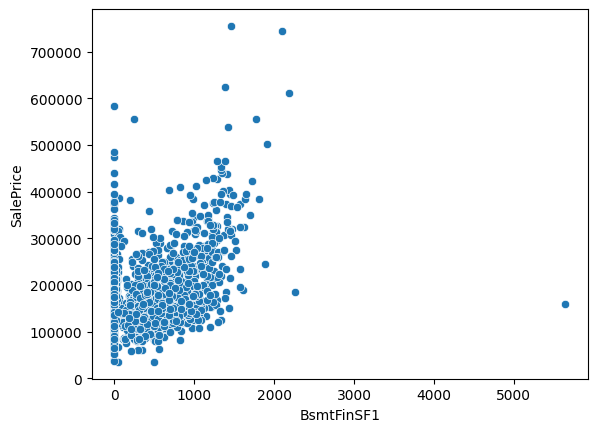

In [38]:
sns.scatterplot(x=df["BsmtFinSF1"], y=df["SalePrice"])

In [41]:
q1 = df["BsmtFinSF1"].quantile(0.025)
q3 = df["BsmtFinSF1"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['BsmtFinSF1'] < lower_bound) | (df['BsmtFinSF1'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
1298,1299,119.05,22698.25,1,10,5,2008,2008,610.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000


In [42]:
# Calculate 97.5th percentile
bsmt_finSF_threshold = df['BsmtFinSF1'].quantile(0.975)

# Cap values at the 97.5th percentile
df['BsmtFinSF1'] = np.where(df['BsmtFinSF1'] > bsmt_finSF_threshold, bsmt_finSF_threshold, df['BsmtFinSF1'])

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

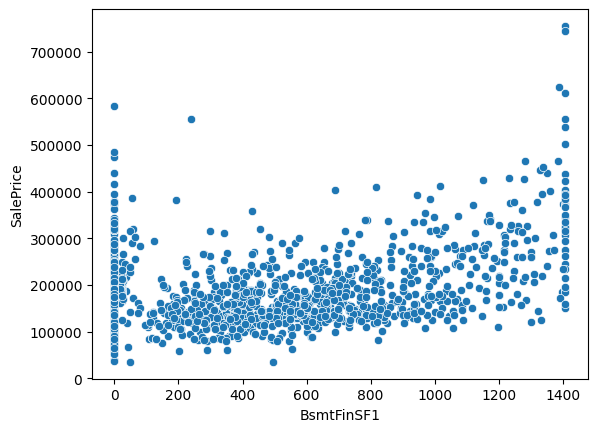

In [44]:
sns.scatterplot(x=df["BsmtFinSF1"], y=df["SalePrice"])

(array([1.325e+03, 4.300e+01, 2.500e+01, 2.800e+01, 1.900e+01, 8.000e+00,
        4.000e+00, 7.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  147.4,  294.8,  442.2,  589.6,  737. ,  884.4, 1031.8,
        1179.2, 1326.6, 1474. ]),
 <BarContainer object of 10 artists>)

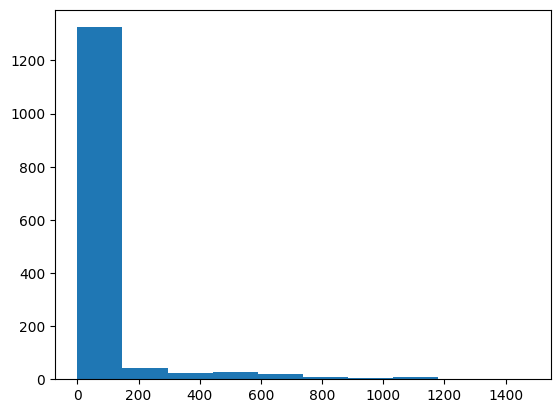

In [45]:
plt.hist(df["BsmtFinSF2"])

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

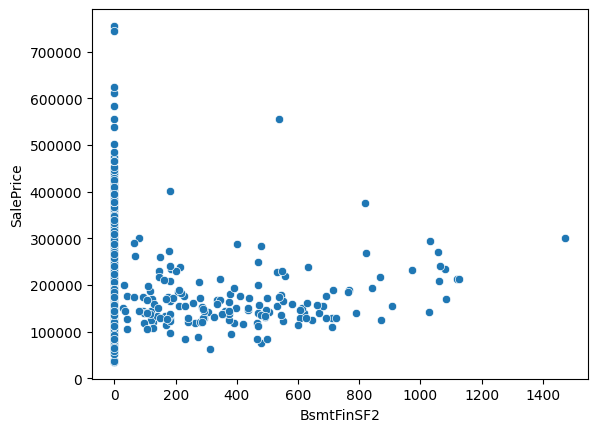

In [47]:
sns.scatterplot(x=df["BsmtFinSF2"], y=df["SalePrice"])

In [58]:
q1 = df["BsmtFinSF2"].quantile(0.025)
q3 = df["BsmtFinSF2"].quantile(0.975)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['BsmtFinSF2'] < lower_bound) | (df['BsmtFinSF2'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice


In [53]:
# Calculate 97.5th percentile
bsmt_finSF2_threshold = df['BsmtFinSF2'].quantile(0.975)

# Cap values at the 97.5th percentile
df['BsmtFinSF2'] = np.where(df['BsmtFinSF2'] > bsmt_finSF2_threshold, bsmt_finSF2_threshold, df['BsmtFinSF2'])

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

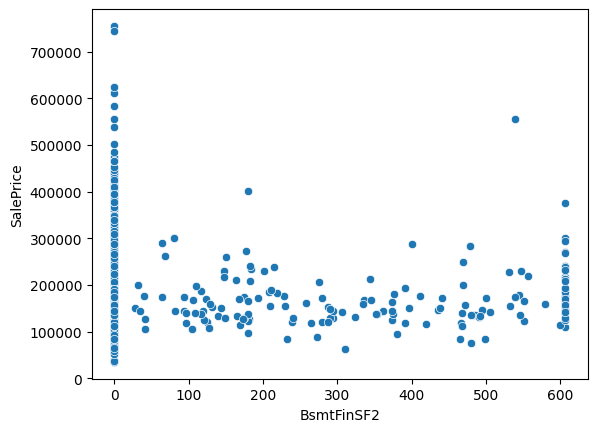

In [54]:
sns.scatterplot(x=df["BsmtFinSF2"], y=df["SalePrice"])

(array([375., 346., 256., 216., 106.,  72.,  53.,  24.,   9.,   3.]),
 array([   0. ,  233.6,  467.2,  700.8,  934.4, 1168. , 1401.6, 1635.2,
        1868.8, 2102.4, 2336. ]),
 <BarContainer object of 10 artists>)

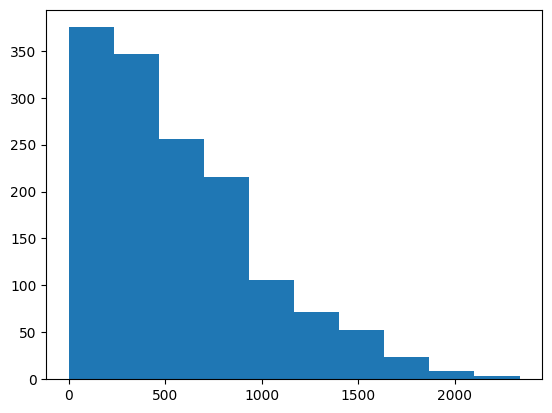

In [59]:
plt.hist(df["BsmtUnfSF"])

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

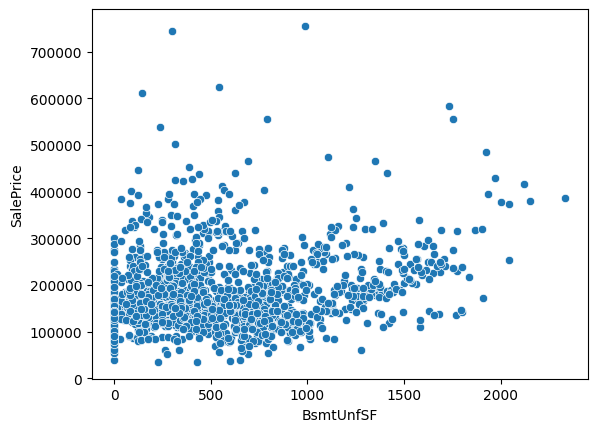

In [60]:
sns.scatterplot(x=df["BsmtUnfSF"], y=df["SalePrice"])

In [65]:
q1 = df["BsmtUnfSF"].quantile(0.25)
q3 = df["BsmtUnfSF"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['BsmtUnfSF'] < lower_bound) | (df['BsmtUnfSF'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice


(array([121., 907., 372.,  52.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([   0.,  611., 1222., 1833., 2444., 3055., 3666., 4277., 4888.,
        5499., 6110.]),
 <BarContainer object of 10 artists>)

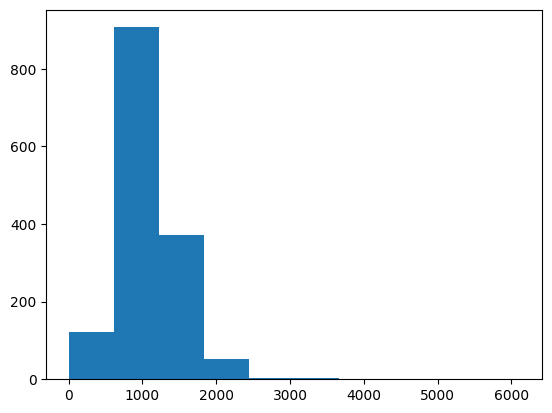

In [66]:
plt.hist(df["TotalBsmtSF"])

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

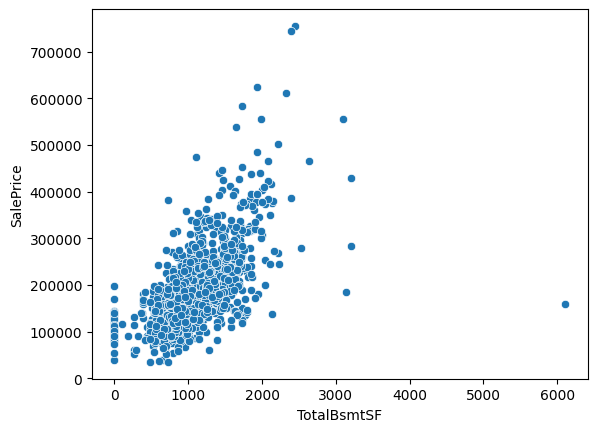

In [67]:
sns.scatterplot(x=df["TotalBsmtSF"], y=df["SalePrice"])

In [70]:
q1 = df["TotalBsmtSF"].quantile(0.25)
q3 = df["TotalBsmtSF"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['TotalBsmtSF'] < lower_bound) | (df['TotalBsmtSF'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
332,333,85.00,10655.00,1,8,5,2003,2004,296.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284000
496,497,69.00,12692.00,1,8,5,1992,1993,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430000
1298,1299,119.05,22698.25,1,10,5,2008,2008,610.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000


In [71]:
# Calculate 97.5th percentile
total_bsmtSF_threshold = df['TotalBsmtSF'].quantile(0.975)

# Cap values at the 97.5th percentile
df['TotalBsmtSF'] = np.where(df['TotalBsmtSF'] > total_bsmtSF_threshold, total_bsmtSF_threshold, df['TotalBsmtSF'])

(array([ 39.,  15.,  50., 225., 369., 278., 159., 144., 106.,  75.]),
 array([   0.  ,  194.13,  388.26,  582.39,  776.52,  970.65, 1164.78,
        1358.91, 1553.04, 1747.17, 1941.3 ]),
 <BarContainer object of 10 artists>)

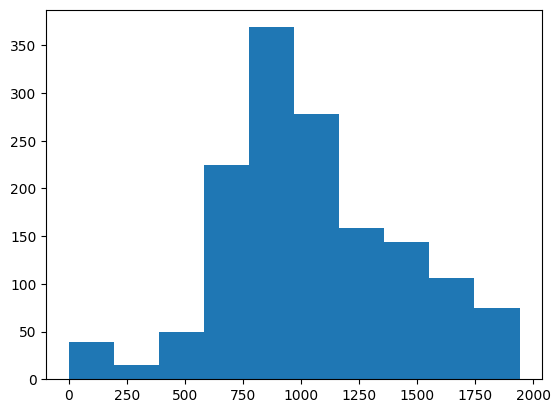

In [72]:
plt.hist(df["TotalBsmtSF"])

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

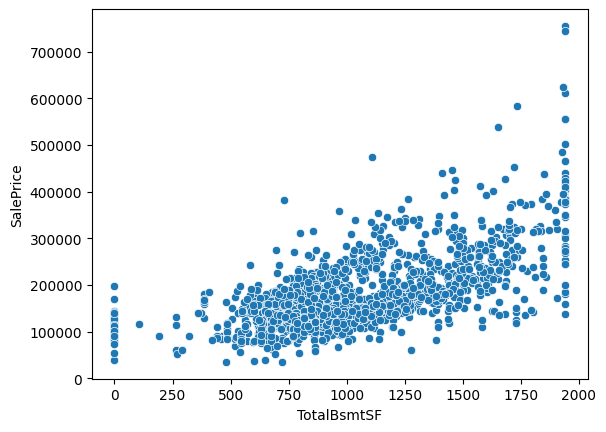

In [73]:
sns.scatterplot(x=df["TotalBsmtSF"], y=df["SalePrice"])

In [74]:
saleprice_column = df.pop("SalePrice")
df['SalePrice'] = saleprice_column
df.head()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,1,65.0,8450.0,1,7,5,2003,2003,196.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,2,80.0,9600.0,1,6,8,1976,1976,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,3,68.0,11250.0,1,7,5,2001,2002,162.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,4,60.0,9550.0,1,7,5,1915,1970,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,84.0,14260.0,1,8,5,2000,2000,350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000


In [75]:
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(X_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8162505388673349

In [81]:
df.to_csv("encoded.csv", index=False)